In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
import os

In [2]:
#8235_sleep
#/media/andrey/My Passport/Sleep

In [3]:
path_concat = "/media/andrey/My Passport/GIN/Anesthesia_CA1/calcium imaging transition state/concatenated/F0/20200504_GCaMP6f_mouse#F0_iso_2/suite2p/plane0"

In [5]:
stats = np.load(path_concat + '/stat.npy',allow_pickle=True)
Traces = np.load(path_concat + '/F.npy')
Npil = np.load(path_concat + '/Fneu.npy')
iscell = np.load(path_concat + '/iscell.npy')

In [6]:
stats

array([{'ypix': array([117, 117, 117, 117, 117, 117, 117, 118, 118, 118, 118, 118, 118,
       118, 118, 118, 118, 119, 119, 119, 119, 119, 119, 119, 119, 119,
       119, 119, 119, 119, 120, 120, 120, 120, 120, 120, 120, 120, 120,
       120, 120, 120, 120, 120, 120, 121, 121, 121, 121, 121, 121, 121,
       121, 121, 121, 121, 121, 121, 121, 121, 122, 122, 122, 122, 122,
       122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 123, 123, 123,
       123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 124,
       124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124,
       124, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125,
       125, 125, 125, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126,
       126, 126, 126, 126, 126, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 129, 129, 129, 129, 129, 129, 129, 129,
       129, 129, 129, 130, 130, 130, 130, 130, 1

In [ ]:
path_separate = "/media/andrey/My Passport/Data/No_concat_Transition_state_new_data_for_suite2p_th_s_1.0_5000reffremes/20200504_GCaMP6f_mouse#F0_iso_2"

0 0h 389
1 1h 399
2 2h 433
3 3h 651
4 4h 579
5 5h 417
6 6h 707


Text(0.5, 1.0, '8235')

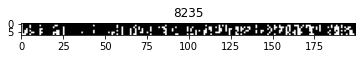

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


path = "/media/andrey/My Passport/CA_IMAGING_DATA/Sleep/meta_recordings_sleep.xlsx"
path4results = '/media/andrey/My Passport/Concatenation_vs_separate/results/'
save_plots_path = '/media/andrey/My Passport/CA_IMAGING_DATA/Sleep/'

#from paths import path, path4results, save_plots_path, animals_for_analysis

animal = 8235

meta_data = pd.read_excel(path)
meta_animal = meta_data[meta_data['Mouse'] == animal]
recordings = meta_animal['Number']

from pystackreg import StackReg
sr = StackReg(StackReg.AFFINE)
sr = StackReg(StackReg.RIGID_BODY)

tmats_loaded = np.load(path4results + 'StackReg/' + str(animal) + "_best_tmats" + '.npy')

active_neurons_in_recording = np.zeros((100000,7),dtype=np.int16)



for idx, recording in enumerate(recordings):
    myfile = np.load(path4results + 'IDneuronsStackReg/' + str(animal) + '/' + str(idx) + 'bis.npy')
    #print(len(myfile),min(myfile),max(myfile))
    #print(myfile)
    
    condition = meta_data['Condition'][recording]
    
    print(idx,condition, len(myfile))


    x = np.array([idx]*len(myfile)) 
    y = myfile
    #plt.plot(x,y,'.k')
    
    active_neurons_in_recording[myfile.astype(dtype='int'),idx]+=1


plt.imshow(np.transpose(active_neurons_in_recording[:200,0:20]),cmap="binary")
plt.title(str(animal))


In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


path = "/media/andrey/My Passport/CA_IMAGING_DATA/Sleep/meta_recordings_sleep.xlsx"
path4results = '/media/andrey/My Passport/Concatenation_vs_separate/results/'
save_plots_path = '/media/andrey/My Passport/CA_IMAGING_DATA/Sleep/'


common_roi_condition = np.zeros((512,512))
common_roi_recording = np.zeros((512,512))

images_mean_enh = np.zeros((512, 512, np.shape(recordings)[0]))
images_mean_enh_rgb = np.zeros((512,512,4))

for idx, recording in enumerate(recordings):
    

    myfile = np.load(path4results + 'IDneuronsStackReg/' + str(animal) + '/' + str(idx) + 'bis.npy')
    
    options = np.load(meta_data['Folder'][recording] + meta_data['Subfolder'][recording] + \
                              str(int(meta_data['Recording idx'][recording])) + \
'/suite2p/plane0/ops.npy',allow_pickle=True)
    
    images_mean_enh[:, :, idx] = options.item(0)['meanImgE']
                
    stats = np.load(meta_data['Folder'][recording] + 
                  meta_data['Subfolder'][recording] +
                  str(int(meta_data['Recording idx'][recording])) +
                  '/suite2p/plane0/stat.npy',
                  allow_pickle=True)

    iscell = np.load(meta_data['Folder'][recording] + 
                  meta_data['Subfolder'][recording] +
                  str(int(meta_data['Recording idx'][recording])) +
                  '/suite2p/plane0/iscell.npy',
                  allow_pickle=True)
    
    #stats = stats[iscell[:, 0].astype(bool)]  ## Interesting point

    common_roi_recording = np.zeros((512,512))
    
    for i, stat in enumerate(stats):
        common_roi_recording[stat['ypix'],stat['xpix']] = 5
        if(common_across_conditions[int(myfile[i])]==1):
            common_roi_recording[stat['ypix'],stat['xpix']] = 10
            
    common_roi_recording = sr.transform(common_roi_recording, tmat=tmats_loaded[0, idx, :, :])
    
    common_roi_condition += common_roi_recording
    if(idx==11):    ### iso, keta, fenta,awa   4, 9,14,18
        break

    plt.imshow(common_roi_condition, cmap='inferno')
    plt.show()


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [15]:
options = np.load(str(meta_data['Folder'][recording]) + str(meta_data['Subfolder'][recording]) +
                              str(int(meta_data['Recording idx'][recording])) +
                              '/suite2p/plane0/ops.npy',
                              allow_pickle=True)

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [20]:
str(meta_data['Folder'][recording]) + str(meta_data['Subfolder'][recording]) + \
str(int(meta_data['Recording idx'][recording])) + '/suite2p/plane0/ops.npy'

'nan20201029_GCaMP6f_8235_awake/2/2/suite2p/plane0/ops.npy'